<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

In [4]:
import matplotlib
from matplotlib import pyplot as plt

Text(0.5, 0, 'Time(mins)')

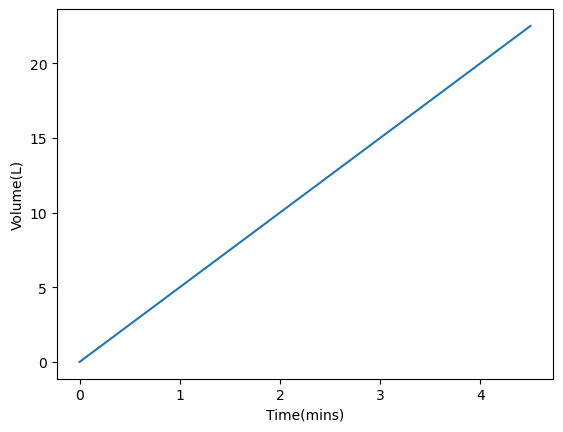

In [5]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)    # Record volume
    dV = rate * dt               # Calculate change in volume
    volume += dV                 # Update the new volume

# Because we can...
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')

### 1.2 An overflowing bucket

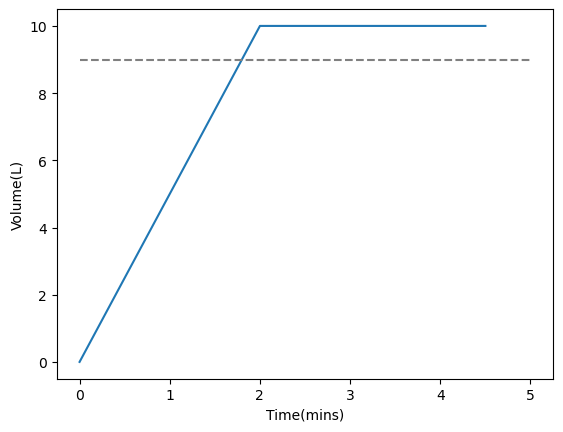

In [6]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

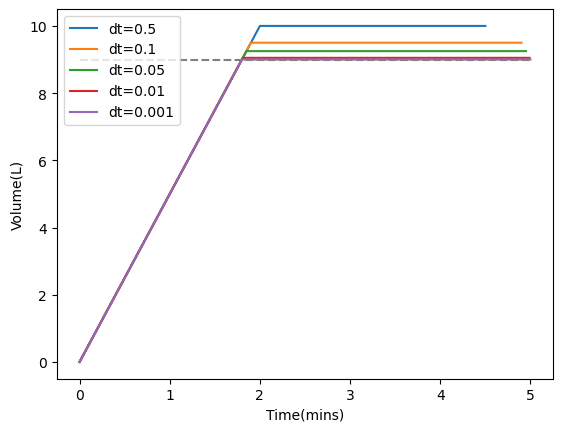

In [7]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L

for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()

### 1.3 A leaky bucket

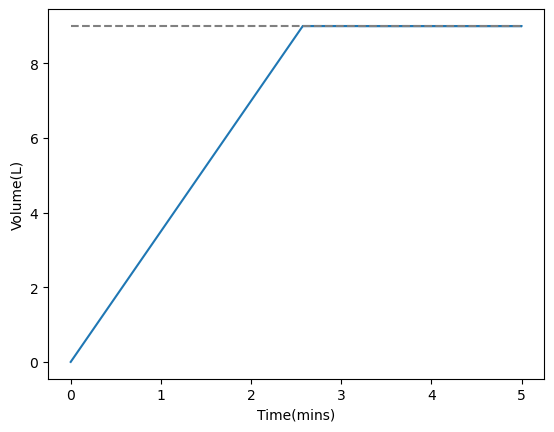

In [8]:
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)

    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume

    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.4 Let’s turn off the tap

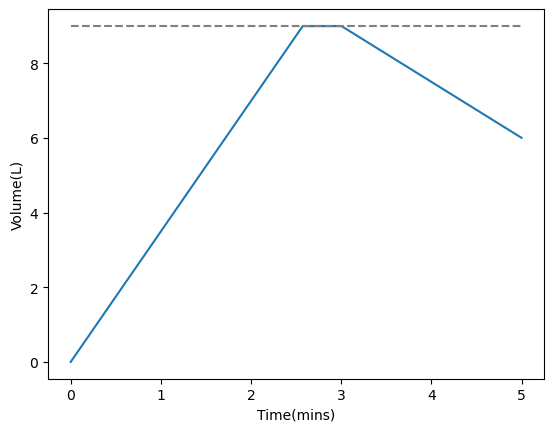

In [9]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### Using while

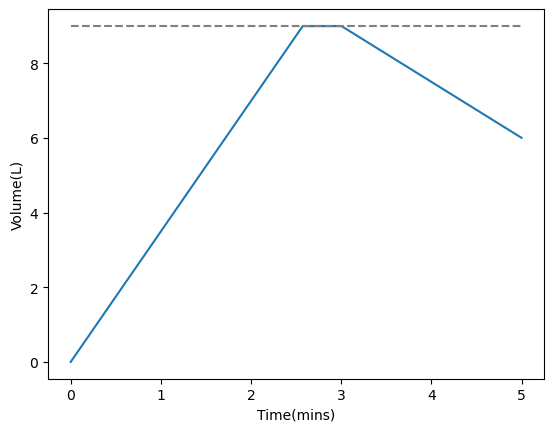

In [10]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.5 A quick summary

In [12]:
#1.Establish a relationship that connects the changes of the variables.
#2.Pick a starting value
#3.Take a step, and calculate the changes.
#4.Update the variables
#5.Keep on going until you have the desired number of points.
#6.If you want to improve accuracy, take smaller steps.

### 1.6 We just solved a differential equation!

$\dfrac{dV}{dt}=R$ \
$\dfrac{ΔV}{Δt}≈\dfrac{dV}{dt}=R$ \
$ΔV=RΔt$

## 2 Simulating Radioactivity

### 2.1 Introduction

$\dfrac{dN}{dt}=-\lambda N$ (N is the number of radioactive nuclei, λ is the decay constant)

### 2.2 Approximating the differential equation

$\dfrac{ΔN}{Δt}≈-\lambda N$ \
$ΔN≈-\lambda NΔt$

### 2.3 Getting a feel

### 2.4 Let’s write some code

Text(0.5, 0, 'Time(Millions of years)')

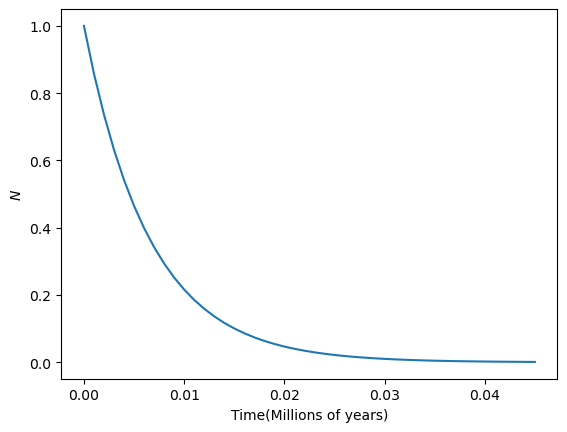

In [14]:
decay_constant = 142       # For 85 Rb (per Myr)
stop_fraction = 1E-3       # stop when the sample has shrunk to
                           # this fraction of the starting value
N0 = 1                     # Starting value of N (in billions of atoms)
dt = .001
time, N = 0, N0            # Starting values

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)

    dN = -decay_constant*N*dt
    N += dN

    if N < N0*stop_fraction:
        break

    time += dt


plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')

### 2.5 Some things to note about the code

In [16]:
# True condition with while loop
# Will continue running until use break

### 2.6 A quick summary

In [15]:
#1.Rewrite the equation in an approximate form that connects the changes of one variable to another. i.e. 
#2.Pick starting values for the variables.
#3.Step the control variable (time in the previous case) and calculate the corresponding changes in the other variables.
#4.Update the variables
#5.Repeat until you reach the desired end.
#6.Make the step size smaller if you want greater accuracy.

## Exercise 1 :  A more realistic leak

In [63]:
import math

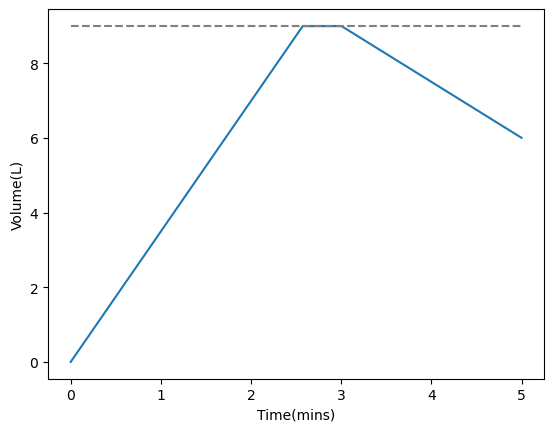

In [118]:
#eg
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV     

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

In [111]:
from math import log10, floor
def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [112]:
def leak_rate(volume):
    leak = (0.0001*math.sqrt(1008 * volume))*1000
    return round(leak,3)

In [ ]:
#rate of leak 
# = area of leak * speed of water
# = area of leak * sqrt(2gh)
# = 1cm^3 * sqrt(2.98m/s^2 * v L /700cm^2)
# = 0.0001m^2 * sqrt(2.98*3600 m/min^2 * v L /0.07m^2)
# = 0.0001m^2 * sqrt(70560 m/min^2 * 0.001v m^3/0.007 m^2)
# = 0.0001m^2 * sqrt(1008v m^2/min^2)
# = 0.0001 * sqrt(1008v) m/min
# = (0.0001 * sqrt(1008v) ) x 1000 L/min


0
0.005
0.009776
0.014462
0.01908
0.023641000000000002
0.028153000000000004
0.03262
0.037047000000000004
0.041436
0.04579
0.050110999999999996
0.05439999999999999
0.05865899999999999
0.06288999999999999
0.06709399999999999
0.07127199999999999
0.07542399999999999
0.079552
0.083657
0.087739
0.091799
0.095837
0.09985400000000001
0.10385100000000001
0.10782800000000002
0.11178500000000002
0.11572300000000003
0.11964300000000004
0.12354500000000004
0.12742900000000004
0.13129600000000005
0.13514600000000004
0.13897900000000005
0.14279500000000006
0.14659500000000006
0.15037900000000007
0.15414800000000006
0.15790100000000007
0.16163900000000006
0.16536300000000007
0.16907200000000008
0.1727670000000001
0.1764470000000001
0.1801130000000001
0.18376600000000012
0.18740500000000013
0.19103100000000012
0.19464300000000012
0.1982420000000001
0.20182800000000012
0.2054020000000001
0.20896300000000012
0.21251200000000012
0.21604800000000013
0.21957200000000013
0.22308400000000014
0.226584000000000

/var/folders/f3/vxgsfp6n4q34v2_06slb_tpm0000gn/T/ipykernel_49158/4082145689.py:8: RuntimeWarning: invalid value encountered in sqrt
  leak = (0.0001*np.sqrt(1008 * volume))*1000


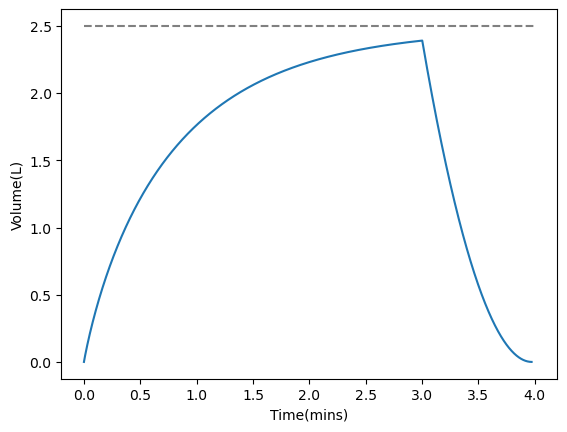

In [163]:
#mine
import math
from math import log10, floor
def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

def leak_rate(volume):
    leak = (0.0001*np.sqrt(1008 * volume))*1000
    print(volume)
    return round(leak,3) #round leak to 3sf

# missing information: capacity of bucket, input of water from tap
# assume bucket capacity - 2.5 L
# bucket never fills fully to 2.5 L due to leak

tap_off_time = 3                 # When the tap goes off
max_time = 4                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
   
bucket_capacity = 2.5              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0


while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate(volume) * dt
    volume -= leak_volume

    if (volume < bucket_capacity) and (time < tap_off_time):
        volume += dV    


    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')